In [ ]:
ks = [0,2,4,6,8]
omega = 10

In [165]:
from numpy import sqrt,pi,exp,linspace,zeros,rot90
from math import factorial
import matplotlib.pyplot as plt
from scipy.special import hermite

N=len(ks)

def H(k,x):
    if k==0:
        return 1
    if k==1:
        return 2*x
    if k==2:
        return (2*x)**2-2
    if k==3:
        return (2*x)**3-6*(2*x)
    if k==4:
        return (2*x)**4-12*(2*x)**2+12
    if k==5:
        return 32*x**5-160*x**3+120*x
    if k==6:
        return 64*x**6-480*x**4+720*x**2-120
    if k==7:
        return 128*x**7-1344*x**5+3360*x**3-1680*x 
    if k==8:
        return 256*x**8-3584*x**6+13440*x**4-13440*x**2+1680
    else:
        print('wrong value of k!!!')
        return float('none')
        
def phi(k,x):
    return omega**(0.25)/(sqrt(sqrt(pi)*2**(k)*factorial(k)))*exp(-omega*x**2/2)*H(k,sqrt(omega)*x)
    # = hermite(k)
    #return omega**(0.25)/(sqrt(sqrt(pi)*2**(k)*factorial(k)))*exp(-omega*x**2/2)*f(sqrt(omega)*x)

def getRhoTG(x):
    out = 0.0
    for k in range(0,N):
        out += phi(k,x)**2
    return out/factorial(N)

def getRhoFree(x):
    return phi(0,x)**2

def getG2TG(x,xp,ks):
    out = 0.0
    for k in ks:
        for kp in ks:
            if kp!=k:
                out += phi(k,x)**2*phi(kp,xp)**2-phi(k,x)*phi(k,xp)*phi(kp,x)*phi(kp,xp)
    return out/factorial(N)

In [166]:
xs = linspace(-N/2,N/2,81)
xps = linspace(-N/2,N/2,81)


G2s = zeros([81,81],dtype=float)
for i in range(81):
    for ip in range(81):
        G2s[i,ip] = getG2TG(xs[i],xps[ip],ks=ks)
    

In [172]:
cutsToPlot = [1/2,3/5,2/3]

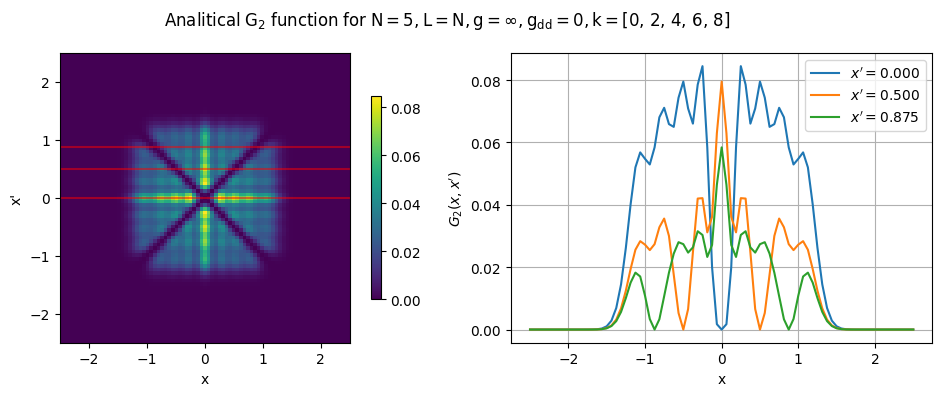

In [173]:
fig,ax = plt.subplots(1,2,figsize=[10,4])
im = ax[0].imshow(rot90(G2s),extent=[-N/2,N/2,-N/2,N/2])
fig.colorbar(im, ax=ax[0], location='right', shrink=0.7)

for cut in cutsToPlot:
    ax[1].plot(xs,[G2s[i,int(G2s.shape[0]*cut)]for i in range(G2s.shape[0])],label=r"$x'=%.3f$"%xs[int(G2s.shape[0]*cut)])
#ax[1].plot(xs,[G2s[i,int(2*G2s.shape[0]/3)]for i in range(G2s.shape[0])],label=r"$x'=%.3f$"%xs[int(2*G2s.shape[0]/3)])
#ax[1].plot(xs,[G2s[i,int(3*G2s.shape[0]/4)]for i in range(G2s.shape[0])],label=r"$x'=%.3f$"%xs[int(3*G2s.shape[0]/4)])
    ax[0].axhline(y=xs[int(G2s.shape[0]*cut)],c='red',alpha=0.5)
#ax[0].axhline(y=xs[int(2*G2s.shape[0]/3)],c='red',alpha=0.5)
#ax[0].axhline(y=xs[int(3*G2s.shape[0]/4)],c='red',alpha=0.5)

ax[1].legend()
ax[1].set_xlabel('x')
ax[0].set_xlabel('x')
ax[1].set_ylabel(r"$G_2(x,x')$")
ax[0].set_ylabel("x'")
ax[1].grid()

fig.suptitle(r'$\rm{Analitical \;G_2\; function\; for\; N=%i, L=N, g=\infty, g_{dd}=0, k=[}$'%N+', '.join([str(x) for x in ks])+']')

plt.tight_layout()
plt.show()